# ****Titanic ML competition****
The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

**The Challenge**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1170]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split,GridSearchCV

In [1171]:
# Read data from CSV files into Pandas DataFrames

df_train = pd.read_csv('/kaggle/input/titanic/train.csv')

df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [1172]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1173]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1174]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1175]:
# Generate descriptive statistics for the categorical (non-numeric) columns in the df

df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [1176]:
# Perform a grouping operation on the df based on the 'Pclass' column, and then calculates the mean of the 'Survived' column for each group.

df_train.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [1177]:
# Perform a grouping operation on the df based on the 'Sex' column, and then calculates the mean of the 'Survived' column for each group.

df_train.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1178]:
# Group the df by the 'SibSp' column, which represents the number of SibSp aboard the Titanic for each passenger. 
# Calculate the mean of the 'Survived' column for each group, providing insight into the survival rate based on the number of siblings/spouses.

df_train.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [1179]:
# Group the df by the 'Parch' column, which represents the number of parents/children aboard the Titanic for each passenger. 
# Calculate the mean of the 'Survived' column for each group, providing insight into the survival rate based on the number of parents/children.

df_train.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [1180]:
# Add a new column called 'Family_Size' to both the training and testing DataFrames

df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch'] + 1

df_test['Family_Size'] = df_train['SibSp'] + df_train['Parch'] + 1

In [1181]:
# Group the df by the 'Family_Size' column, which represents the total number of family members (including the passenger themselves) for each passenger. 
# Calculate the mean of the 'Survived' column for each group, providing insight into the survival rate based on family size.

df_train.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [1182]:
# Create a new categorical feature called 'Family_Size_Grouped' based on the 'Family_Size' column in both the training and testing DataFrames. 

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}

df_train['Family_Size_Grouped'] = df_train['Family_Size'].map(family_map)
df_test['Family_Size_Grouped'] = df_test['Family_Size'].map(family_map)

In [1183]:
# Group the df by the newly created categorical feature 'Family_Size_Grouped', which categorizes the total number of family members (including the passenger themselves) into different groups. 
# Calculates the mean of the 'Survived' column for each group, providing insight into the survival rate based on family size groups.

df_train.groupby(['Family_Size_Grouped'], as_index=False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [1184]:
# Group the df by the 'Embarked' column, which represents the port of embarkation for each passenger. 
# Calculate the mean of the 'Survived' column for each group, providing insight into the survival rate based on the port of embarkation.

df_train.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

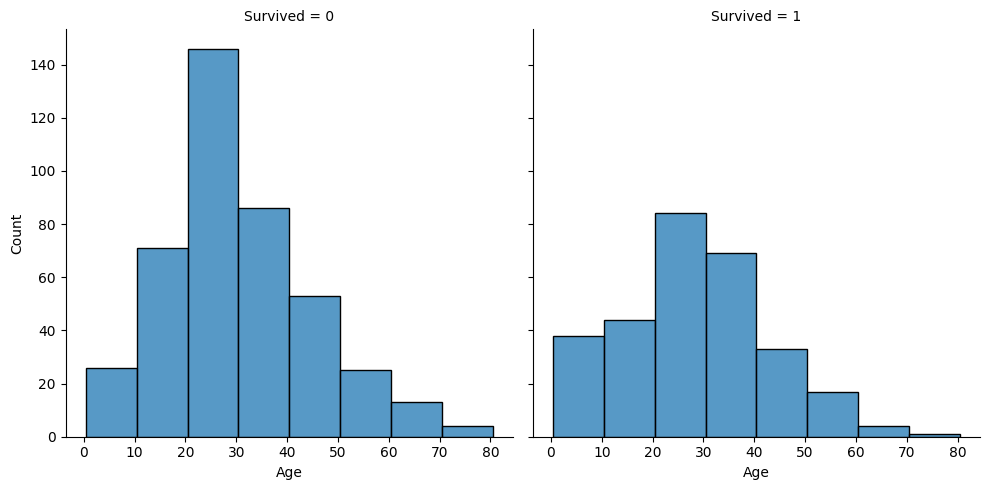

In [1185]:
# Visualize to compare the age distributions between the two groups and understand any patterns or differences in survival based on age.

sns.displot(df_train, x='Age', col='Survived', binwidth=10, height=5)

In [1186]:
# Create a new categorical feature called 'Age_Cut' in both the training and testing df.

df_train['Age_Cut'] = pd.qcut(df_train['Age'], 8)
df_test['Age_Cut'] = pd.qcut(df_test['Age'], 8)

In [1187]:
# Group the df by the newly created categorical feature 'Age_Cut', which represents the bins (quantiles) into which the age of each passenger falls. 
# Calculate the mean of the 'Survived' column for each group, providing insight into the survival rate based on age groups.

df_train.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

/tmp/ipykernel_33/2992594631.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [1188]:
# Transform the continuous 'Age' feature into a categorical feature with numerical codes representing different age groups. 
# This type of preprocessing is often used to simplify the model's learning process and capture non-linear relationships between age and the target variable.

df_train.loc[df_train['Age'] <= 16, 'Age'] = 0
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <= 20.125), 'Age'] = 1
df_train.loc[(df_train['Age'] > 20.125) & (df_train['Age'] <= 24), 'Age'] = 2
df_train.loc[(df_train['Age'] > 24) & (df_train['Age'] <= 28), 'Age'] = 3
df_train.loc[(df_train['Age'] > 28) & (df_train['Age'] <= 32.312), 'Age'] = 4
df_train.loc[(df_train['Age'] > 32.312) & (df_train['Age'] <= 38), 'Age'] = 5
df_train.loc[(df_train['Age'] > 38) & (df_train['Age'] <= 47), 'Age'] = 6
df_train.loc[(df_train['Age'] > 47) & (df_train['Age'] <= 80), 'Age'] = 7
df_train.loc[df_train['Age'] > 80, 'Age'] 


df_test.loc[df_test['Age'] <= 16, 'Age'] = 0
df_test.loc[(df_test['Age'] > 16) & (df_test['Age'] <= 20.125), 'Age'] = 1
df_test.loc[(df_test['Age'] > 20.125) & (df_test['Age'] <= 24), 'Age'] = 2
df_test.loc[(df_test['Age'] > 24) & (df_test['Age'] <= 28), 'Age'] = 3
df_test.loc[(df_test['Age'] > 28) & (df_test['Age'] <= 32.312), 'Age'] = 4
df_test.loc[(df_test['Age'] > 32.312) & (df_test['Age'] <= 38), 'Age'] = 5
df_test.loc[(df_test['Age'] > 38) & (df_test['Age'] <= 47), 'Age'] = 6
df_test.loc[(df_test['Age'] > 47) & (df_test['Age'] <= 80), 'Age'] = 7
df_test.loc[df_test['Age'] > 80, 'Age'] 



Series([], Name: Age, dtype: float64)

In [1189]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

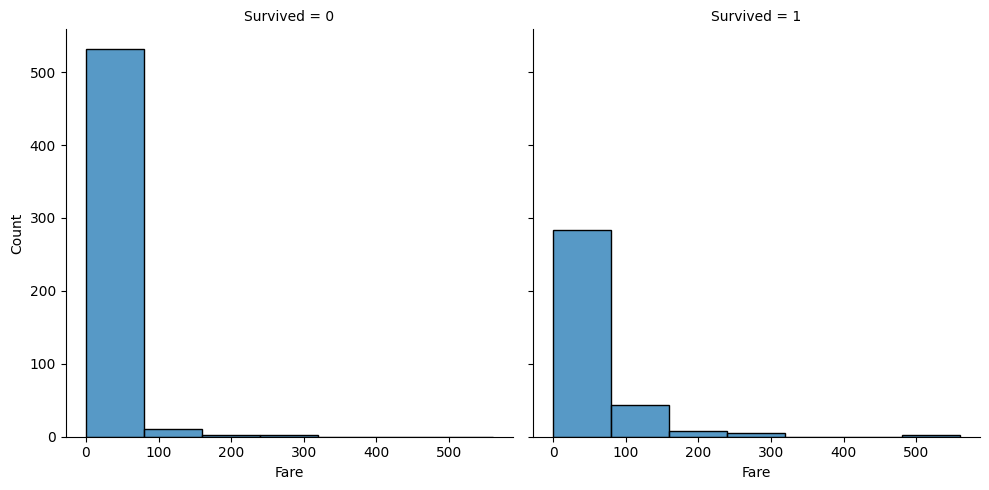

In [1190]:
# This visualization helps to compare the fare distributions between the two groups and understand any patterns or differences in survival based on fare prices.

sns.displot(df_train, x='Fare', col='Survived', binwidth=80, height=5)

In [1191]:
# Create a new categorical feature called 'Fare_Cut' in both the training and testing df.

df_train['Fare_Cut'] = pd.qcut(df_train['Fare'], 6)
df_test['Fare_Cut'] = pd.qcut(df_test['Fare'], 6)

In [1192]:
# Group the df by the newly created categorical feature 'Fare_Cut', which represents the bins (quantiles) into which the fare of each passenger falls. 
# Calculate the mean of the 'Survived' column for each group, providing insight into the survival rate based on fare groups.

df_train.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

/tmp/ipykernel_33/998864796.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [1193]:
#### Categorize the 'Fare' feature into different fare groups by assigning numerical codes to specific fare ranges.
# Transform the continuous 'Fare' feature into a categorical feature with numerical codes representing different fare groups. 
# This type of preprocessing is often used to simplify the model's learning process and capture non-linear relationships between fare and the target variable.

df_train.loc[df_train['Fare'] <= 7.775, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 7.775) & (df_train['Fare'] <= 8.662), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 8.662) & (df_train['Fare'] <= 14.454), 'Fare'] = 2
df_train.loc[(df_train['Fare'] > 14.454) & (df_train['Fare'] <= 26.0), 'Fare'] = 3
df_train.loc[(df_train['Fare'] > 26.0) & (df_train['Fare'] <= 52.369), 'Fare'] = 4
df_train.loc[(df_train['Fare'] > 52.369) & (df_train['Fare'] <= 512.329), 'Fare'] = 5
df_train.loc[df_train['Fare'] > 512.329, 'Fare']


df_test.loc[df_test['Fare'] <= 7.775, 'Fare'] = 0
df_test.loc[(df_test['Fare'] > 7.775) & (df_test['Fare'] <= 8.662), 'Fare'] = 1
df_test.loc[(df_test['Fare'] > 8.662) & (df_test['Fare'] <= 14.454), 'Fare'] = 2
df_test.loc[(df_test['Fare'] > 14.454) & (df_test['Fare'] <= 26.0), 'Fare'] = 3
df_test.loc[(df_test['Fare'] > 26.0) & (df_test['Fare'] <= 52.369), 'Fare'] = 4
df_test.loc[(df_test['Fare'] > 52.369) & (df_test['Fare'] <= 512.329), 'Fare'] = 5
df_test.loc[df_test['Fare'] > 512.329, 'Fare']

343    512.3292
Name: Fare, dtype: float64

In [1194]:
#Checking the structure of the Name Feature

df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [1195]:
#Splitting the Name features to get the titles i.e Mr, Mrs, Miss and then assigning to a new column/feature called Title. 
# -strip at the end is gonna remove the spaces

df_train['Title'] = df_train['Name'].str.split(pat= ",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x:x.strip())

df_test['Title'] = df_test['Name'].str.split(pat= ",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x:x.strip())

In [1196]:
#Check the mean of the survived persons by Title

df_train.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [1197]:
# collapsing some titles into category

#military - Capt, Col, Major
#noble - Jonkheer, the Countess, Don, Lady, Sir
#unmaried Female - Mlle, Ms, Mme


df_train['Title'] = df_train['Title'].replace({
    'Capt':'Military',
    'Col':'Military',
    'Major':'Military',
    'Jonkheer':'Noble',
    'the Countess':'Noble',
    'Don':'Noble',
    'Lady':'Noble',
    'Sir':'Noble',
    'Mlle':'Noble',
    'Ms':'Noble',
    'Mme':'Noble'
})

df_test['Title'] = df_test['Title'].replace({
    'Capt':'Military',
    'Col':'Military',
    'Major':'Military',
    'Jonkheer':'Noble',
    'the Countess':'Noble',
    'Don':'Noble',
    'Lady':'Noble',
    'Sir':'Noble',
    'Mlle':'Noble',
    'Ms':'Noble',
    'Mme':'Noble'
})

In [1198]:
#Check the count & mean of the survived persons by Title after collapsing some titles into category

df_train.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [1199]:
#Creating a new column/feature that will contain name lengths to see if they have an impact

df_train['Name_Length'] = df_train['Name'].apply(lambda x: len(x))
df_test['Name_Length'] = df_test['Name'].apply(lambda x: len(x))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


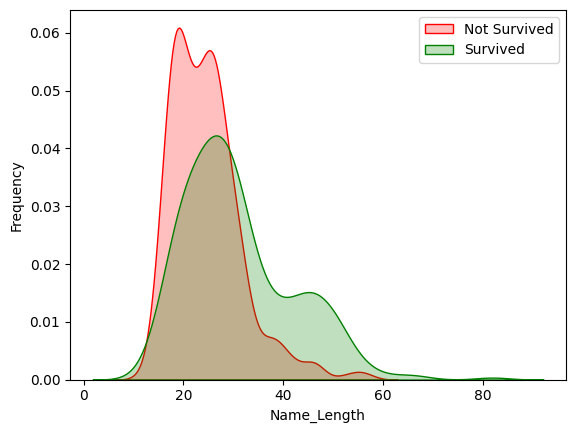

In [1200]:
# Generate a kernel density estimate (KDE) plot using seaborn (sns) to visualize the distribution of the 'Name_Length' feature in the df, differentiated by the survival status.

g = sns.kdeplot(df_train['Name_Length'][(df_train['Survived']==0) & (df_train['Name_Length'].notnull())], color='Red', fill=True)
g = sns.kdeplot(df_train['Name_Length'][(df_train['Survived']==1) & (df_train['Name_Length'].notnull())], ax=g, color='Green', fill=True)

g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [1201]:
# Bin the values of the 'Name_Length' column into 8 equal-sized bins using quantiles (pd.qcut) and assigns the bin labels to the Name_LengthGB column.

df_train['Name_LengthGB'] = pd.qcut(df_train['Name_Length'], 8)
df_test['Name_LengthGB'] = pd.qcut(df_test['Name_Length'], 8)

In [1202]:
# Check the mean of the survived persons by Name_LengthGB

df_train.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

/tmp/ipykernel_33/2314007540.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [1203]:
# Create a new feature called 'Name_Size' based on the length of the name ('Name_Length') in both train and test. 
# Categorize the names into different size categories.

df_train.loc[df_train['Name_Length'] <= 18, 'Name_Size'] = 0
df_train.loc[(df_train['Name_Length'] > 18) & (df_train['Name_Length'] <= 20), 'Name_Size'] = 1
df_train.loc[(df_train['Name_Length'] > 20) & (df_train['Name_Length'] <= 23), 'Name_Size'] = 2
df_train.loc[(df_train['Name_Length'] > 23) & (df_train['Name_Length'] <= 25), 'Name_Size'] = 3
df_train.loc[(df_train['Name_Length'] > 25) & (df_train['Name_Length'] <= 27.25), 'Name_Size'] = 4
df_train.loc[(df_train['Name_Length'] > 27.25) & (df_train['Name_Length'] <= 30), 'Name_Size'] = 5
df_train.loc[(df_train['Name_Length'] > 30) & (df_train['Name_Length'] <= 38), 'Name_Size'] = 6
df_train.loc[(df_train['Name_Length'] > 38) & (df_train['Name_Length'] <= 82), 'Name_Size'] = 7
df_train.loc[df_train['Name_Length'] > 82, 'Name_Size'] 


 
df_test.loc[df_test['Name_Length'] <= 18, 'Name_Size'] = 0
df_test.loc[(df_test['Name_Length'] > 18) & (df_test['Name_Length'] <= 20), 'Name_Size'] = 1
df_test.loc[(df_test['Name_Length'] > 20) & (df_test['Name_Length'] <= 23), 'Name_Size'] = 2
df_test.loc[(df_test['Name_Length'] > 23) & (df_test['Name_Length'] <= 25), 'Name_Size'] = 3
df_test.loc[(df_test['Name_Length'] > 25) & (df_test['Name_Length'] <= 27.25), 'Name_Size'] = 4
df_test.loc[(df_test['Name_Length'] > 27.25) & (df_test['Name_Length'] <= 30), 'Name_Size'] = 5
df_test.loc[(df_test['Name_Length'] > 30) & (df_test['Name_Length'] <= 38), 'Name_Size'] = 6
df_test.loc[(df_test['Name_Length'] > 38) & (df_test['Name_Length'] <= 82), 'Name_Size'] = 7
df_test.loc[df_test['Name_Length'] > 82, 'Name_Size']


Series([], Name: Name_Size, dtype: float64)

In [1204]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [1205]:
df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [1206]:
# create a new column 'Ticket_Number', containing only the numerical part of the ticket information extracted from the 'Ticket' column.

df_train['Ticket_Number'] = df_train['Ticket'].apply(lambda x:pd.Series({'Ticket': x.split()[-1]}))
df_test['Ticket_Number'] = df_test['Ticket'].apply(lambda x:pd.Series({'Ticket': x.split()[-1]}))

In [1207]:
# Generate a summary table that shows the count (no of passengers) and the mean survival rate for each unique ticket number, 
# Sort by the count of passengers for each ticket number in descending order. 
# This analysis helps to understand if there is any correlation between ticket numbers and passenger survival rates.

df_train.groupby(['Ticket_Number'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,Ticket_Number,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [1208]:
# Compute the count of occurrences of each unique ticket number in the 'Ticket_Number' column

df_train.groupby('Ticket_Number')['Ticket_Number'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket_Number, Length: 891, dtype: int64

In [1209]:
#Assign the count of unique occurences of ticket number to a new column/feature called Ticket_Number_Counts

df_train['Ticket_Number_Counts'] = df_train.groupby('Ticket_Number')['Ticket_Number'].transform('count')
df_test['Ticket_Number_Counts'] = df_test.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [1210]:
# Generate a summary table that shows the ticket number count (no of passengers) and the mean survival rate for each unique ticket number count, 
# Sort by the ticket number count of passengers for each ticket number in descending order. 
# This analysis helps to understand if there is any correlation between ticket numbers and passenger survival rates.

df_train.groupby(['Ticket_Number_Counts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,Ticket_Number_Counts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [1211]:
df_train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [1212]:
# splits the 'Ticket' column into separate columns based on spaces, allowing for further analysis or processing of the individual components of the ticket numbers.

df_train['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [1213]:
#  Create a new column called 'Ticket_Location'. 
# Extract the location information from the 'Ticket' column and assigns it to the 'Ticket_Location' column.

df_train['Ticket_Location'] = np.where(df_train['Ticket'].str.split(pat=" ", expand=True)[1].notna(), df_train['Ticket'].str.split(pat=" ",expand=True)[0].apply(lambda x: x.strip()),'Blank')
df_test['Ticket_Location'] = np.where(df_test['Ticket'].str.split(pat=" ", expand=True)[1].notna(), df_test['Ticket'].str.split(pat=" ",expand=True)[0].apply(lambda x: x.strip()),'Blank')

In [1214]:
df_train['Ticket_Location'].value_counts()

Ticket_Location
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [1215]:
# Clean and standardize the values in the 'Ticket_Location' column. 
# Replace certain variations of ticket locations with their standardized forms

df_train['Ticket_Location'] = df_train['Ticket_Location'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C'
})


df_test['Ticket_Location'] = df_test['Ticket_Location'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C'
})

In [1216]:
# Perform an analysis on the training dataset (df_train) based on the 'Ticket_Location' column.

df_train.groupby(['Ticket_Location'], as_index=False)['Survived'].agg(['count', 'mean'])

,Ticket_Location,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [1217]:
# Fill missing values in the 'Cabin' column with 'U' (Unknown) and extracts the first character (cabin letter) from each non-null cabin value

df_train['Cabin'] = df_train['Cabin'].fillna('U')
df_train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in df_train['Cabin']])

df_test['Cabin'] = df_test['Cabin'].fillna('U')
df_test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in df_test['Cabin']])

In [1218]:
# Perform an analysis on the training dataset (df_train) based on the 'Cabin' column.

df_train.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [1219]:
#  Create a new column 'Cabin_Assigned', where 0 indicates that the cabin is not assigned ('U' for 'Unknown'), and 1 indicates that the cabin is assigned (any other value). 
# This column provides a binary indicator of whether a cabin is assigned or not for each passenger.

df_train['Cabin_Assigned'] = df_train['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
df_test['Cabin_Assigned'] = df_test['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [1220]:
# Perform an analysis on the training dataset (df_train) based on the 'Cabin_Assigned' column.

df_train.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [1221]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,Ticket_Number,Ticket_Number_Counts,Ticket_Location,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


### Data Cleaning

In [1222]:
df_train.shape

(891, 24)

In [1223]:
df_test.shape

(418, 23)

In [1224]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           891 non-null    int64   
 1   Survived              891 non-null    int64   
 2   Pclass                891 non-null    int64   
 3   Name                  891 non-null    object  
 4   Sex                   891 non-null    object  
 5   Age                   714 non-null    float64 
 6   SibSp                 891 non-null    int64   
 7   Parch                 891 non-null    int64   
 8   Ticket                891 non-null    object  
 9   Fare                  891 non-null    float64 
 10  Cabin                 891 non-null    object  
 11  Embarked              889 non-null    object  
 12  Family_Size           891 non-null    int64   
 13  Family_Size_Grouped   891 non-null    object  
 14  Age_Cut               714 non-null    category
 15  Fare_C

In [1225]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'Ticket_Number', 'Ticket_Number_Counts',
       'Ticket_Location', 'Cabin_Assigned'],
      dtype='object')

In [1226]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           418 non-null    int64   
 1   Pclass                418 non-null    int64   
 2   Name                  418 non-null    object  
 3   Sex                   418 non-null    object  
 4   Age                   332 non-null    float64 
 5   SibSp                 418 non-null    int64   
 6   Parch                 418 non-null    int64   
 7   Ticket                418 non-null    object  
 8   Fare                  417 non-null    float64 
 9   Cabin                 418 non-null    object  
 10  Embarked              418 non-null    object  
 11  Family_Size           418 non-null    int64   
 12  Family_Size_Grouped   418 non-null    object  
 13  Age_Cut               332 non-null    category
 14  Fare_Cut              417 non-null    category
 15  Title 

In [1227]:
df_train.isnull().sum()

PassengerId               0
Survived                  0
Pclass                    0
Name                      0
Sex                       0
Age                     177
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                     0
Embarked                  2
Family_Size               0
Family_Size_Grouped       0
Age_Cut                 177
Fare_Cut                  0
Title                     0
Name_Length               0
Name_LengthGB             0
Name_Size                 0
Ticket_Number             0
Ticket_Number_Counts      0
Ticket_Location           0
Cabin_Assigned            0
dtype: int64

In [1228]:
# Fill missing values in the 'Age' and 'Fare' columns with the mean values of those columns.

df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

/tmp/ipykernel_33/2139299603.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
/tmp/ipykernel_33/2139299603.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [1229]:
# Set up instances of three different preprocessing transformers commonly used in machine learning pipelines

ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [1230]:
# These lists can be populated later in the code as columns are identified for processing. 
    # For example, if a column named 'category' is intended to be processed using ordinal encoding, its name can be appended to the ode_cols list (ode_cols.append('category')). 
    # Similarly, if another column named 'color' is intended to be processed using one-hot encoding, its name can be appended to the ohe_cols list (ohe_cols.append('color')). 
# These lists help keep track of which columns need which type of encoding during the preprocessing stage.

ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

<Axes: >

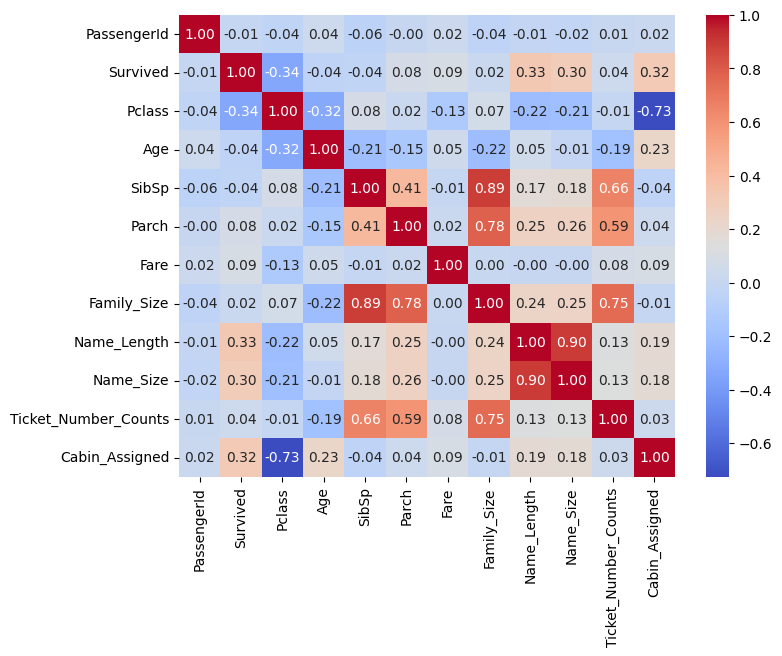

In [1231]:
# Visual representation of the correlation between numeric columns 

correlation_matrix = df_train.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [1232]:
# Prepare the feature variables (X) and the target variable (y) for training a machine learning model. 
# Prepare the feature variables for the testing dataset (X_test).

X = df_train.drop(['Survived', 'SibSp', 'Parch'], axis=1)
y = df_train['Survived']

X_test = df_test.drop(['Age_Cut', 'Fare_Cut', 'SibSp', 'Parch'], axis=1)

In [1233]:
# Use the train_test_split function from scikit-learn to split the dataset into training and validation subsets for both the feature variables (X) and the target variable (y).

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

In [1234]:
# The ordinal_pipeline pipeline performs two steps sequentially: imputing missing values with the most frequent value and encoding categorical features into ordinal integers. 
# This pipeline can then be used as part of a larger machine learning workflow, allowing for convenient and consistent preprocessing of ordinal categorical features.

ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [1235]:
# The ohe_pipeline pipeline performs two steps sequentially: imputing missing values with the most frequent value and then performing one-hot encoding on the categorical features. 
# This pipeline can be incorporated into a larger machine learning workflow to preprocess categorical features efficiently and consistently.

ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [1236]:
# col_trans is a ColumnTransformer that applies different transformations (imputation, ordinal encoding, one-hot encoding) to different columns of the dataset while also allowing certain columns to pass through without any transformation. 
# This is a powerful way to preprocess datasets with heterogeneous data types efficiently.

col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
   # ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
     ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'Ticket_Number_Counts'])
    ],
    remainder='drop',
    n_jobs=-1)

In [1237]:
# Instantiate RandomForestClassifier

rfc = RandomForestClassifier()

In [1238]:
# Instantiate SimpleImputer to handle missing values
imputer = SimpleImputer()

In [1239]:
# The purpose of defining this parameter grid is to exhaustively search through all the possible combinations of these hyperparameters to find the best combination that maximizes the performance of the model. 
# This process is typically done using techniques like grid search or random search.

param_grid = {
    'n_estimators': [100, 150, 200],
    'min_samples_split': [5, 10, 15],
    'max_depth': [8, 9, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [1240]:
# Set up a grid search cross-validation (CV) process to find the best hyperparameters for a Random Forest Classifier (rfc)

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [1241]:
# Create a final pipeline for training a Random Forest Classifier (RFC) model with the specified preprocessing steps and hyperparameter tuning.

pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [1242]:
# By printing these out, you get insight into which hyperparameters were most effective in improving the performance of the model and what the corresponding cross-validation score was. 

print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
0.8272530286614794


In [1243]:
# Instantiate DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [1244]:
# The purpose of defining this parameter grid is to exhaustively search through all the possible combinations of these hyperparameters to find the best combination that maximizes the performance of the model. 
# This process is typically done using techniques like grid search or random search.

param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [1245]:
# Set up a grid search cross-validation (CV) process to find the best hyperparameters for a Decision Tree Classifier(dtc)

CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [1246]:
# Create a final pipeline for training a Decision Tree Classifier(dtc) model with the specified preprocessing steps and hyperparameter tuning.

pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [1247]:
# By printing these out, you get insight into which hyperparameters were most effective in improving the performance of the model and what the corresponding cross-validation score was. 

print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8159854230276766


In [1248]:
# Instantiate KNN

knn = KNeighborsClassifier()

In [1249]:
# The purpose of defining this parameter grid is to exhaustively search through all the possible combinations of these hyperparameters to find the best combination that maximizes the performance of the model. 
# This process is typically done using techniques like grid search or random search.

param_grid = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    }

In [1250]:
# Set up a grid search cross-validation (CV) process to find the best hyperparameters for KNN

CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [1251]:
# Create a final pipeline for training knn model with the specified preprocessing steps and hyperparameter tuning.

pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [1252]:
# By printing these out, you get insight into which hyperparameters were most effective in improving the performance of the model and what the corresponding cross-validation score was. 

print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.8033881611346401


In [1253]:
# Instantiate Support Vector Classifier (SVC)

svc=SVC()

In [1254]:
# The purpose of defining this parameter grid is to exhaustively search through all the possible combinations of these hyperparameters to find the best combination that maximizes the performance of the model. 
# This process is typically done using techniques like grid search or random search.

param_grid = {
    'C': [100, 10, 1.0, 0.1, 0.001, 0.0001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    }

In [1255]:
# Set up a grid search cross-validation (CV) process to find the best hyperparameters for Support Vector Classifier (SVC)

CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [1256]:
# Create a final pipeline for training the Support Vector Classifier (SVC) model with the specified preprocessing steps and hyperparameter tuning.

pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.0001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [1257]:
# By printing these out, you get insight into which hyperparameters were most effective in improving the performance of the model and what the corresponding cross-validation score was. 

print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.7991529597163399


In [1258]:
#Instantiate Logistic Regression

lr = LogisticRegression()

In [1259]:
# The purpose of defining this parameter grid is to exhaustively search through all the possible combinations of these hyperparameters to find the best combination that maximizes the performance of the model. 
# This process is typically done using techniques like grid search or random search.

param_grid = {
    'C': [100, 10, 1.0, 0.1, 0.001, 0.0001]
    }

In [1260]:
# Set up a grid search cross-validation (CV) process to find the best hyperparameters for Logistic Regression

CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [1261]:
# Create a final pipeline for training the Logistic Regression model with the specified preprocessing steps and hyperparameter tuning.

pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.0001]}))])

In [1262]:
# By printing these out, you get insight into which hyperparameters were most effective in improving the performance of the model and what the corresponding cross-validation score was. 

print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.8048163104501134


In [1263]:
# Instantiate Naive Bayes

gnb = GaussianNB()

In [1264]:
# The purpose of defining this parameter grid is to exhaustively search through all the possible combinations of these hyperparameters to find the best combination that maximizes the performance of the model. 
# This process is typically done using techniques like grid search or random search.

param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
    }

In [1265]:
# Set up a grid search cross-validation (CV) process to find the best hyperparameters for Naive Bayes

CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [1266]:
# Create a final pipeline for training the Logistic Regression model with the specified preprocessing steps and hyperparameter tuning.

pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Number_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [1267]:
# By printing these out, you get insight into which hyperparameters were most effective in improving the performance of the model and what the corresponding cross-validation score was. 

print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-09}
0.7795035949965528


In [1268]:
# Make predictions on a testing dataset using several machine learning models that have been previously trained and fitted using pipelines.

Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)

In [1269]:
# Generate DataFrames for submissions to be used in a Kaggle competition

submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': Y_pred
})


submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': Y_pred
})


submission2 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': Y_pred2
})


submission3 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': Y_pred3
})


submission4 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': Y_pred4
})


submission5 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': Y_pred5
})


submission6 = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': Y_pred6
})

In [1270]:
# Save the DataFrames containing the predictions into CSV files

submission.to_csv('/kaggle/working/submission1104_1.csv', index=False)
submission2.to_csv('/kaggle/working/submission1104_2.csv', index=False)
submission3.to_csv('/kaggle/working/submission1104_3.csv', index=False)
submission4.to_csv('/kaggle/working/submission1104_4.csv', index=False)
submission5.to_csv('/kaggle/working/submission1104_5.csv', index=False)
submission6.to_csv('/kaggle/working/submission1104_6.csv', index=False)